# CITS 4012 - Project 1

### Henry Liu ( 22672083 )

## Introduction

This project is to create a rule based job seeker chatbot that can hold a conversation with a user who searches for a job. The dataset **(seek_australia.csv)** we use in this project contains job descriptions in natural language, alongside structured information about city, job categories, and salary scale. The project will focus on processing the job descriptions

## Setup Libraries and load data set

### Import libraries

In [2]:
import os
import tarfile
import urllib.request
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [42]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
#import nltk
#nltk.download('punkt')

In [5]:
#import nltk
#nltk.download('lexical_diversity')

### Take a quick look at the data structure

In [6]:
data = pd.read_csv("project1/seek_australia.csv")

In [7]:
len(data)

30000

In [8]:
sorted(set(data))

['category',
 'city',
 'company_name',
 'geo',
 'job_board',
 'job_description',
 'job_title',
 'job_type',
 'post_date',
 'salary_offered',
 'state',
 'url']

In [9]:
len(set(data)) / len(data)

0.0004

In [10]:
data.head()

,category,city,company_name,geo,job_board,job_description,job_title,job_type,post_date,salary_offered,state,url
0,Retail & Consumer Products,Sydney,Frontline Executive Retail Sydney,AU,seek,Have you had 10 years experience in fresh pro...,Store Manager - Fresh Produce,Full Time,2018-04-15T23:13:45Z,$100k Base + Super + Benefits,North Shore & Northern Beaches,https://www.seek.com.au/job/35989382
1,Government & Defence,Brisbane,Powerlink,AU,seek,The Opportunity: The Client Solution Analyst ...,Client Solution Analyst,Full Time,2018-04-15T23:04:40Z,Excellent remuneration packages,Northern Suburbs,https://www.seek.com.au/job/35989272
2,Trades & Services,Sydney,Richard Jay Laundry,AU,seek,An innovative business development role for a...,Service Technician / Installer - NSW,Full Time,2018-04-15T23:04:31Z,NaN,Parramatta & Western Suburbs,https://www.seek.com.au/job/35989270
3,Trades & Services,Melbourne,Adaptalift Hyster,AU,seek,About the role: We are seeking an Automotive W...,Workshop Technician I Material Handling Equipment,Full Time,2018-04-16T03:15:17Z,NaN,Bayside & South Eastern Suburbs,https://www.seek.com.au/job/35993203
4,Trades & Services,Adelaide,Bakers Delight G&M,AU,seek,Â Early starts and weekend shifts. No experie...,APPRENTICESHIP JUNIOR BAKER,Full Time,2018-04-16T01:26:50Z,NaN,NaN,https://www.seek.com.au/job/35991578


In [11]:
data.describe()

,category,city,company_name,geo,job_board,job_description,job_title,job_type,post_date,salary_offered,state,url
count,30000,30000,30000,30000,30000,29655,30000,30000,30000,8952,19180,30000
unique,30,65,9054,1,1,26850,20979,4,24747,5373,19,30000
top,Trades & Services,Sydney,Private Advertiser,AU,seek,Today we have around 250 people who work to h...,Business Development Manager,Full Time,2018-04-16T09:29:00Z,"$100,502 - $114,624",CBD & Inner Suburbs,https://www.seek.com.au/job/35989382
freq,3346,9412,1491,30000,30000,101,122,20203,14,130,4690,1


**From *describe()* we can find that all data *'geo'* is *'AU'* and all *'job_board'* is *‘seek’*.**

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   category         30000 non-null  object
 1   city             30000 non-null  object
 2   company_name     30000 non-null  object
 3   geo              30000 non-null  object
 4   job_board        30000 non-null  object
 5   job_description  29655 non-null  object
 6   job_title        30000 non-null  object
 7   job_type         30000 non-null  object
 8   post_date        30000 non-null  object
 9   salary_offered   8952 non-null   object
 10  state            19180 non-null  object
 11  url              30000 non-null  object
dtypes: object(12)
memory usage: 2.7+ MB


In [13]:
data["city"].value_counts()

Sydney                                  9412
Melbourne                               7361
Brisbane                                2951
Perth                                   2026
Adelaide                                1195
                                        ... 
Tumut, Southern Highlands & Snowy         15
Albany & Great Southern                   13
Fleurieu Peninsula & Kangaroo Island      11
Somerset & Lockyer                        10
Central & South East                       4
Name: city, Length: 65, dtype: int64

In [14]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [15]:
def tf(text, token):
    count = text.count(token) 
    total = len(text)
    return 100 * count / total

In [16]:
lexical_diversity(data)

0.0004

In [17]:
#tf(data["city"], 'Sydney')

In [18]:
len(data["city"])

30000

In [19]:
data["city"]

0                     Sydney
1                   Brisbane
2                     Sydney
3                  Melbourne
4                   Adelaide
                ...         
29995                 Sydney
29996                    ACT
29997              Melbourne
29998                    ACT
29999    Dubbo & Central NSW
Name: city, Length: 30000, dtype: object

In [20]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [21]:
data_city = list(data.city)

In [22]:
lexical_diversity(data_city)

0.0021666666666666666

In [23]:
len(data_city)

30000

In [24]:
data_city[20]

'Newcastle, Maitland & Hunter'

**First occurs**

In [25]:
data_city.index("Newcastle, Maitland & Hunter")

20

In [26]:
data_city[60:65]#60, 61, 62, 63, 64

['Newcastle, Maitland & Hunter', 'Sydney', 'Hobart', 'Adelaide', 'Melbourne']

In [27]:
fdist_data = FreqDist(data)

In [28]:
fdist_data_city = FreqDist(data.city)

In [29]:
fdist_data_category = FreqDist(data.category)

In [30]:
fdist_data_city

FreqDist({'Sydney': 9412, 'Melbourne': 7361, 'Brisbane': 2951, 'Perth': 2026, 'Adelaide': 1195, 'ACT': 884, 'Newcastle, Maitland & Hunter': 558, 'Gold Coast': 530, 'Geelong & Great Ocean Road': 297, 'Darwin': 254, ...})

In [31]:
fdist_data_category

FreqDist({'Trades & Services': 3346, 'Information & Communication Technology': 2802, 'Healthcare & Medical': 2371, 'Manufacturing, Transport & Logistics': 2220, 'Administration & Office Support': 1766, 'Accounting': 1648, 'Hospitality & Tourism': 1483, 'Sales': 1464, 'Government & Defence': 1346, 'Construction': 1326, ...})

In [32]:
fdist_data_city.most_common(20)

[('Sydney', 9412),
 ('Melbourne', 7361),
 ('Brisbane', 2951),
 ('Perth', 2026),
 ('Adelaide', 1195),
 ('ACT', 884),
 ('Newcastle, Maitland & Hunter', 558),
 ('Gold Coast', 530),
 ('Geelong & Great Ocean Road', 297),
 ('Darwin', 254),
 ('Mackay & Coalfields', 252),
 ('Cairns & Far North', 239),
 ('Sunshine Coast', 236),
 ('Wollongong, Illawarra & South Coast', 230),
 ('Townsville & Northern QLD', 224),
 ('Port Hedland, Karratha & Pilbara', 217),
 ('Hobart', 181),
 ('Gosford & Central Coast', 165),
 ('Toowoomba & Darling Downs', 160),
 ('Rockhampton & Capricorn Coast', 126)]

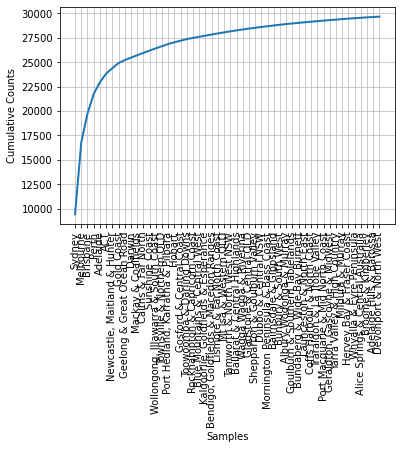

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [33]:
fdist_data_city.plot(50, cumulative=True)

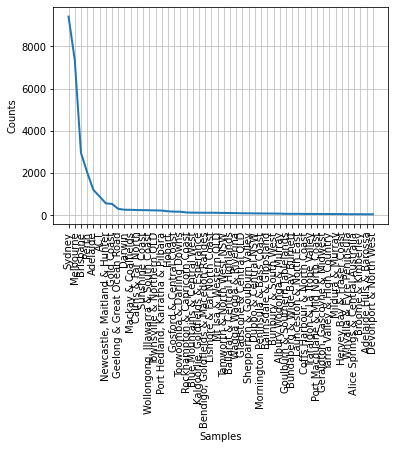

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [34]:
fdist_data_city.plot(50)

In [35]:
sydney_job = [w for w in fdist_data_city if 'Sydney' in fdist_data_city or 'Trades & Services' in fdist_data_category] 
sorted(sydney_job)

['ACT',
 'Adelaide',
 'Adelaide Hills & Barossa',
 'Albany & Great Southern',
 'Albury Wodonga & Murray',
 'Alice Springs & Central Australia',
 'Bairnsdale & Gippsland',
 'Ballarat & Central Highlands',
 'Bendigo, Goldfields & Macedon Ranges',
 'Blue Mountains & Central West',
 'Brisbane',
 'Broome & Kimberley',
 'Bunbury & South West',
 'Bundaberg & Wide Bay Burnett',
 'Cairns & Far North',
 'Central & South East',
 'Coffs Harbour & North Coast',
 'Coober Pedy & Outback SA',
 'Darwin',
 'Devonport & North West',
 'Dubbo & Central NSW',
 'Far West & North Central NSW',
 'Fleurieu Peninsula & Kangaroo Island',
 'Geelong & Great Ocean Road',
 'Geraldton, Gascoyne & Midwest',
 'Gladstone & Central QLD',
 'Gold Coast',
 'Gosford & Central Coast',
 'Goulburn & Southern Tablelands',
 'Hervey Bay & Fraser Coast',
 'Hobart',
 'Horsham & Grampians',
 'Kalgoorlie, Goldfields & Esperance',
 'Katherine & Northern Australia',
 'Launceston & North East',
 'Lismore & Far North Coast',
 'Mackay & Coa

In [36]:
sydney_job = [w for w in fdist_data_city if fdist_data_city == 'Sydney' and fdist_data_category == 'Trades & Services'] 
sorted(sydney_job)

[]

In [37]:
fdist_data_category.most_common()

[('Trades & Services', 3346),
 ('Information & Communication Technology', 2802),
 ('Healthcare & Medical', 2371),
 ('Manufacturing, Transport & Logistics', 2220),
 ('Administration & Office Support', 1766),
 ('Accounting', 1648),
 ('Hospitality & Tourism', 1483),
 ('Sales', 1464),
 ('Government & Defence', 1346),
 ('Construction', 1326),
 ('Education & Training', 1224),
 ('Retail & Consumer Products', 986),
 ('Community Services & Development', 933),
 ('Mining, Resources & Energy', 857),
 ('Engineering', 837),
 ('Call Centre & Customer Service', 720),
 ('Banking & Financial Services', 707),
 ('Marketing & Communications', 701),
 ('Human Resources & Recruitment', 700),
 ('Real Estate & Property', 597),
 ('Legal', 593),
 ('Design & Architecture', 296),
 ('Insurance & Superannuation', 258),
 ('Advertising, Arts & Media', 162),
 ('Consulting & Strategy', 158),
 ('Science & Technology', 142),
 ('Sport & Recreation', 140),
 ('Farming, Animals & Conservation', 107),
 ('CEO & General Managemen

In [38]:
fdist_data_category.freq('Trades & Services')

0.11153333333333333

In [39]:
fdist_data_city.most_common()

[('Sydney', 9412),
 ('Melbourne', 7361),
 ('Brisbane', 2951),
 ('Perth', 2026),
 ('Adelaide', 1195),
 ('ACT', 884),
 ('Newcastle, Maitland & Hunter', 558),
 ('Gold Coast', 530),
 ('Geelong & Great Ocean Road', 297),
 ('Darwin', 254),
 ('Mackay & Coalfields', 252),
 ('Cairns & Far North', 239),
 ('Sunshine Coast', 236),
 ('Wollongong, Illawarra & South Coast', 230),
 ('Townsville & Northern QLD', 224),
 ('Port Hedland, Karratha & Pilbara', 217),
 ('Hobart', 181),
 ('Gosford & Central Coast', 165),
 ('Toowoomba & Darling Downs', 160),
 ('Rockhampton & Capricorn Coast', 126),
 ('Blue Mountains & Central West', 117),
 ('Kalgoorlie, Goldfields & Esperance', 114),
 ('Bendigo, Goldfields & Macedon Ranges', 113),
 ('Lismore & Far North Coast', 113),
 ('Mt Isa & Western QLD', 108),
 ('Tamworth & North West NSW', 103),
 ('Ballarat & Central Highlands', 99),
 ('Wagga Wagga & Riverina', 96),
 ('Gladstone & Central QLD', 87),
 ('Shepparton & Goulburn Valley', 85),
 ('Dubbo & Central NSW', 82),
 ('M

In [40]:
fdist_data_city.freq('Sydney')

0.3137333333333333

In [41]:
import sys
sys.executable

'/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10'

In [51]:
import spacy

In [52]:
from spacy.tokens.doc import Doc 
from spacy.vocab import Vocab
"""
create a spacy.tokens.doc.Doc object
using its constructor
"""
doc = Doc(Vocab(), words = [u'Hello', u'World!']) 
print(doc)
print(type(doc))

Hello World! 
<class 'spacy.tokens.doc.Doc'>


In [58]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [90]:

nlp = spacy.load('en_core_web_sm')
doc = nlp(u'fdist_data_city')
# token_text1 and token_text2 produce the same results
token_text1 = [token.text for token in doc]
token_text2 = [doc[i].text for i in range(len(doc))]
print(token_text1)
print(token_text2)

['fdist_data_city']
['fdist_data_city']


In [91]:
#子串
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(u'I want a green apple.')
print([t for t in doc[4].lefts])
print([t for t in doc[4].children])
print([t for t in doc[1].rights])

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/_z/d5rjv38n0ds0tp8bhdpvq35h0000gn/T/ipykernel_4460/3195513352.py", line 4, in <cell line: 4>
    doc = nlp(data.job_description)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/spacy/language.py", line 1005, in __call__
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/spacy/language.py", line 1096, in _ensure_doc
    losses = {}
ValueError: [E866] Expected a string or 'Doc' as input, but got: <class 'pandas.core.series.Series'>.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line

In [64]:
#编码
nlp = spacy.load('en_core_web_sm')
doc = nlp('I love coffee!')
for token in doc:
    lexeme = doc.vocab[token.text]
    print(lexeme.text, lexeme.orth, lexeme.shape_,lexeme.prefix_, lexeme.suffix_, lexeme.is_alpha, lexeme.is_digit, lexeme.is_title, lexeme.lang_)
print(doc.vocab.strings["coffee"]) # 3197928453018144401 
print(doc.vocab.strings[3197928453018144401]) # 'coffee'

I 4690420944186131903 X I I True False True en
love 3702023516439754181 xxxx l ove True False False en
coffee 3197928453018144401 xxxx c fee True False False en
! 17494803046312582752 ! ! ! False False False en
3197928453018144401
coffee


In [69]:
#front  end
from spacy.matcher import Matcher
from spacy.tokens import Doc, Span, Token
nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)
# A dependency label pattern that matches a word sequence
pattern = [{"DEP": "nsubj"},{"DEP": "aux"},{"DEP": "ROOT"}] 
matcher.add("NsubjAuxRoot", [pattern])
doc = nlp(u"We can overtake them.")
# 1. Return (match_id, start, end) tuples
matches = matcher(doc)
for match_id, start, end in matches:
    span = doc[start:end]
    print("Span: ", span.text)
    print("The positions in the doc are: ", start, "-", end)
# 2. Return Span objects directly
matches = matcher(doc, as_spans=True)
for span in matches:
    print(span.text, span.label_)

Span:  We can overtake
The positions in the doc are:  0 - 3
We can overtake NsubjAuxRoot


In [71]:

doc = nlp(u'The Golden Gate Bridge is an iconic landmark in San Francisco.')
# Retokenize to treat each noun_chunk as a single token
with doc.retokenize() as retokenizer: 
    for chunk in doc.noun_chunks:
        print(chunk.text + ' ' + str(type(chunk)))
        retokenizer.merge(chunk) #doc.retokenize().merge(chunk)
for token in doc: 
    print(token)

The Golden Gate Bridge <class 'spacy.tokens.span.Span'>
an iconic landmark <class 'spacy.tokens.span.Span'>
San Francisco <class 'spacy.tokens.span.Span'>
The Golden Gate Bridge
is
an iconic landmark
in
San Francisco
.


In [72]:
doc = nlp(u'A storm hit the beach. It started to rain.') 
for sent in doc.sents:
    print(type(sent))
# Sentence level index
    [sent[i] for i in range(len(sent))]
# Doc level index
[doc[i] for i in range(len(doc))]

<class 'spacy.tokens.span.Span'>
<class 'spacy.tokens.span.Span'>


[A, storm, hit, the, beach, ., It, started, to, rain, .]

In [73]:
nltk.download('punkt') # Sentence Tokenize
nltk.download('averaged_perceptron_tagger') # POS Tagging
nltk.download('maxent_ne_chunker') # Named Entity Chunking
nltk.download('words') # Word Tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/liugensheng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/liugensheng/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/liugensheng/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     /Users/liugensheng/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [74]:
texts = [u"A storm hit the beach in Perth. It started to rain."] 
for text in texts:
    sentences = nltk.sent_tokenize(text) 
    for sentence in sentences:
        words = nltk.word_tokenize(sentence) 
        tagged_words = nltk.pos_tag(words) 
        ne_tagged_words = nltk.ne_chunk(tagged_words) 
        print(ne_tagged_words)

(S A/DT storm/NN hit/VBD the/DT beach/NN in/IN (GPE Perth/NNP) ./.)
(S It/PRP started/VBD to/TO rain/VB ./.)


In [77]:
from spacy import displacy
doc.user_data['title'] = "An example of an entity visualization" 
displacy.render(doc, style='ent')

In [78]:
jupyter=False, page=True

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1236757294.py, line 1)

In [79]:
from pathlib import Path
# the page=True indicates that we want to write to a file
html = displacy.render(doc, style='ent', jupyter=False, page=True)
output_path = Path("project1/ent_visual.html")
output_path.open("w", encoding="utf-8").write(html)

548

In [80]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'ner', 'attribute_ruler', 'lemmatizer']

In [82]:
doc = nlp(u'I need a taxi to Cottesloe.') 
for ent in doc.ents:
    print(ent.text, ent.label_)

Cottesloe GPE


In [107]:
# Specify new label and training data
LABEL = 'SUBURB'
TRAIN_DATA = [('I need a taxi to Cottesloe',
                { 'entities': [(17, 26, 'SUBURB')] }),
              ('I like red oranges', { 'entities': []})]

In [108]:
# Add new label to the ner pipe
ner = nlp.get_pipe('ner') 
ner.add_label(LABEL)

0

In [112]:
# Train
optimizer = nlp.create_optimizer() 
import random
from spacy.tokens import Doc
from spacy.training import Example 
for i in range(25):
    random.shuffle(TRAIN_DATA)
    for text, annotations in TRAIN_DATA:
        doc = Doc(nlp.vocab, words=text.split(" ")) # We need to create a training example object 
        example = Example.from_dict(doc, annotations) 
        nlp.update([example], sgd=optimizer)

In [114]:
doc = nlp(u'I need a taxi to Crawley')
for ent in doc.ents:
    print(ent.text, ent.label_)

Crawley SUBURB


In [115]:
nlp.to_disk("project1/")

In [116]:
nlp_updated = spacy.load("project1/")

In [117]:
doc = nlp_updated(u'I need a taxi to Subiaco') 
for ent in doc.ents:
    print(ent.text, ent.label_)

Subiaco SUBURB


In [119]:
pip show spacy

Name: spacy
Version: 3.0.8
Summary: Industrial-strength Natural Language Processing (NLP) in Python
Home-page: https://spacy.io
Author: Explosion
Author-email: contact@explosion.ai
License: MIT
Location: /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages
Requires: blis, catalogue, cymem, jinja2, murmurhash, numpy, packaging, pathy, preshed, pydantic, requests, setuptools, spacy-legacy, srsly, thinc, tqdm, typer, wasabi
Required-by: en-core-web-sm, pyresparser
Note: you may need to restart the kernel to use updated packages.


In [125]:
def dep_pattern(doc):
    for i in range(len(doc)-1):
        if doc[i].dep_ == 'nsubj' and doc[i+1].dep_ == 'aux' and doc[i+2].dep_ =='ROOT':
            for tok in doc[i+2].children: 
                if tok.dep_ == 'dobj':
                    return True
    return False

In [126]:
# doc = nlp(u'We can overtake them.')
doc = nlp(u'I might send them a card as a reminder.')

In [127]:
from spacy import displacy 
displacy.render(doc, style='dep')

In [128]:
options = {'compact': True, 'font': 'Tahoma'} 
displacy.render(doc, style='dep', options=options)

In [130]:
if dep_pattern(doc): 
    print('Found')
else:
    print('Not found')

Found


In [134]:
matcher = Matcher(nlp.vocab)
pattern = [{"DEP": "nsubj"}, {"DEP": "aux"}, {"DEP": "ROOT"}] 
matcher.add("NsubjAuxRoot", [pattern])
doc = nlp("We can overtake them.")
matches = matcher(doc)
for match_id, start, end in matches:
    span = doc[start:end]
    print("Span: ", span.text)
    print("The positions in the doc are: ", start, "-", end) 
    print("Match ID ", match_id)
    print(doc.vocab.strings[match_id])
    for tok in doc[end-1].children:
        if tok.dep_ == 'dobj':
            print("The direct object of {} is {}".format(doc[end-1], tok.dep_))

Span:  We can overtake
The positions in the doc are:  0 - 3
Match ID  10599197345289971701
NsubjAuxRoot
The direct object of overtake is dobj


In [7]:
import telegram
TOKEN = '5167565970:AAEwSajSzaTqZe_r8Gll2A-VBfgmCiEvw4Q'
bot = telegram.Bot(token=TOKEN)

In [8]:
print(bot.get_me())

{'supports_inline_queries': False, 'is_bot': True, 'can_join_groups': True, 'can_read_all_group_messages': False, 'username': 'henry233_bot', 'id': 5167565970, 'first_name': 'NLP_project1'}


In [ ]:
#start the robot
from telegram.ext import Updater, MessageHandler, Filters #function that implements the message handler
def echo(update, context):
    update.message.reply_text(update.message.text)
#creating an Updater instance
updater = Updater(TOKEN, use_context=True)
#registering a handler to handle input text messages 
updater.dispatcher.add_handler(MessageHandler(Filters.text, echo)) #starting polling updates from the messenger 
updater.start_polling()
updater.idle()

In [9]:
import spacy
from telegram.ext import Updater, MessageHandler, Filters #the callback function that uses spaCy
def utterance(update, context):
    msg = update.message.text
    nlp = spacy.load('en_core_web_sm') 
    doc = nlp(msg)
    for token in doc:
        if token.dep_ == 'dobj':
            update.message.reply_text('We are processing your request...') 
            return
    update.message.reply_text('Please rephrase your request. Be as specific as possible!')
#the code responsible for interactions with Telegram
updater = Updater(TOKEN, use_context=True)
updater.dispatcher.add_handler(MessageHandler(Filters.text, utterance))
updater.start_polling()
updater.idle()

In [10]:
text = ["It was the best of times", "it was the worst of times",
"it was the age of wisdom",
"it was the age of foolishness"]

In [13]:
import gensim
import gensim.downloader as api
from gensim.models import TfidfModel
from gensim.corpora import Dictionary

In [14]:
def sent_to_words(sentences): 
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [16]:
doc_tokenized = list(sent_to_words(text))
dictionary = Dictionary()
BoW_corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in doc_tokenized] 
BoW_corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)],
 [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)],
 [(1, 1), (2, 1), (3, 1), (5, 1), (7, 1), (8, 1)],
 [(1, 1), (2, 1), (3, 1), (5, 1), (7, 1), (9, 1)]]

In [17]:
for doc in BoW_corpus:
    print([[dictionary[id], freq] for id, freq in doc])

[['best', 1], ['it', 1], ['of', 1], ['the', 1], ['times', 1], ['was', 1]]
[['it', 1], ['of', 1], ['the', 1], ['times', 1], ['was', 1], ['worst', 1]]
[['it', 1], ['of', 1], ['the', 1], ['was', 1], ['age', 1], ['wisdom', 1]]
[['it', 1], ['of', 1], ['the', 1], ['was', 1], ['age', 1], ['foolishness', 1]]


In [22]:
import numpy as np
tfidf = TfidfModel(BoW_corpus, smartirs='ntc')
# Get the tfidf vector representation of the second sentence
tfidf[BoW_corpus[1]]

[(1, 0.11713529839512132),
 (2, 0.11713529839512132),
 (3, 0.11713529839512132),
 (4, 0.48099076877929253),
 (5, 0.11713529839512132),
 (6, 0.8448462391634637)]

In [23]:
# Get the tfidf transformed corpus,
# then the vector of the second sentence. 
tfidf[BoW_corpus][1]

[(1, 0.11713529839512132),
 (2, 0.11713529839512132),
 (3, 0.11713529839512132),
 (4, 0.48099076877929253),
 (5, 0.11713529839512132),
 (6, 0.8448462391634637)]

In [24]:
# Now a friendlier print out
for doc in tfidf[BoW_corpus]:
    print([[dictionary[id], np.around(freq,decimals=2)] for id, freq in doc])

[['best', 0.84], ['it', 0.12], ['of', 0.12], ['the', 0.12], ['times', 0.48], ['was', 0.12]]
[['it', 0.12], ['of', 0.12], ['the', 0.12], ['times', 0.48], ['was', 0.12], ['worst', 0.84]]
[['it', 0.12], ['of', 0.12], ['the', 0.12], ['was', 0.12], ['age', 0.48], ['wisdom', 0.84]]
[['it', 0.12], ['of', 0.12], ['the', 0.12], ['was', 0.12], ['age', 0.48], ['foolishness', 0.84]]


In [25]:
vocab = [dictionary[i] for i in range(len(dictionary))] 
vocab

['best',
 'it',
 'of',
 'the',
 'times',
 'was',
 'worst',
 'age',
 'wisdom',
 'foolishness']

In [26]:
index = list(range(len(BoW_corpus)))
index

[0, 1, 2, 3]

In [27]:
import pandas as pd
df = pd.DataFrame(data=np.zeros((len(BoW_corpus), len(vocab)), dtype=np.float16),
index=index, columns=vocab)

In [28]:
for idx in index:
    for id, freq in tfidf[BoW_corpus[idx]]:
        df[dictionary[id]][idx] = freq
df


,best,it,of,the,times,was,worst,age,wisdom,foolishness
0,0.844727,0.117126,0.117126,0.117126,0.480957,0.117126,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.117126,0.117126,0.117126,0.480957,0.117126,0.844727,0.000000,0.000000,0.000000
2,0.000000,0.117126,0.117126,0.117126,0.000000,0.117126,0.000000,0.480957,0.844727,0.000000
3,0.000000,0.117126,0.117126,0.117126,0.000000,0.117126,0.000000,0.480957,0.000000,0.844727


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(text).toarray()
tfidf

array([[0.        , 0.60735961, 0.        , 0.31694544, 0.31694544,
        0.31694544, 0.4788493 , 0.31694544, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.31694544, 0.31694544,
        0.31694544, 0.4788493 , 0.31694544, 0.        , 0.60735961],
       [0.4788493 , 0.        , 0.        , 0.31694544, 0.31694544,
        0.31694544, 0.        , 0.31694544, 0.60735961, 0.        ],
       [0.4788493 , 0.        , 0.60735961, 0.31694544, 0.31694544,
        0.31694544, 0.        , 0.31694544, 0.        , 0.        ]])

In [35]:
import numpy as np
# Define labels for the x and y axis
nrows = np.shape(tfidf)[0]
xlabels = tfidf_vectorizer.get_feature_names_out()
ylabels = ['D' + str(idx) for idx in list(np.arange(nrows))]
ylabels

['D0', 'D1', 'D2', 'D3']

In [33]:
xlabels

array(['age', 'best', 'foolishness', 'it', 'of', 'the', 'times', 'was',
       'wisdom', 'worst'], dtype=object)

/var/folders/_z/d5rjv38n0ds0tp8bhdpvq35h0000gn/T/ipykernel_7767/2115098840.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


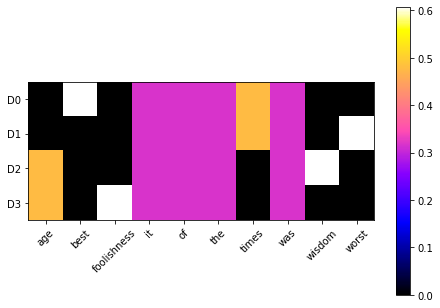

In [39]:
import matplotlib.pyplot as plt
plt.figure()
plt.axes([0, 0, 1, 1])
plt.imshow(tfidf, interpolation='nearest',cmap=plt.cm.gnuplot2, vmin=0) 
plt.xticks(range(len(xlabels)), xlabels, rotation=45) 
plt.yticks(range(nrows), ylabels)
plt.colorbar()
plt.tight_layout()
plt.show()

In [40]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [43]:
from sklearn.datasets import fetch_20newsgroups 
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [44]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [45]:
len(twenty_train.data)

2257

In [46]:
twenty_train.filenames[0]

'/Users/liugensheng/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38440'

In [47]:
print("\n".join(twenty_train.data[0].split("\n")[:3]))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton


In [48]:
print(twenty_train.target_names[twenty_train.target[0]])

comp.graphics


In [49]:
twenty_train.target[:10]

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2])

In [50]:
for t in twenty_train.target[:10]: 
    print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


In [52]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(2257, 35788)

In [53]:
 # The number of times the word 'algorithm' occurs
count_vect.vocabulary_.get(u'algorithm')

4690

In [54]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts) 
X_train_tf = tf_transformer.transform(X_train_counts) 
X_train_tf.shape

(2257, 35788)

In [55]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(2257, 35788)

In [56]:
X_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

In [58]:
docs_new = ['God is love', 'OpenGL on the GPU is fast'] 
X_new_counts = count_vect.transform(docs_new) 
X_new_tfidf = tfidf_transformer.transform(X_new_counts)
predicted = clf.predict(X_new_tfidf)
for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => comp.graphics


In [60]:
from sklearn.pipeline import Pipeline 
text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', MultinomialNB())])

In [61]:
text_clf.fit(twenty_train.data, twenty_train.target)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [64]:
import numpy as np
twenty_test = fetch_20newsgroups(subset='test',
categories=categories, shuffle=True, random_state=42) 
docs_test = twenty_test.data
predicted = text_clf.predict(docs_test)
np.mean(predicted == twenty_test.target)

0.8348868175765646

In [66]:
from sklearn.linear_model import SGDClassifier 
text_clf = Pipeline([
('vect', CountVectorizer()),
('tfidf', TfidfTransformer()),
('clf', SGDClassifier(loss='hinge', penalty='l2',
alpha=1e-3, random_state=42, max_iter=5, tol=None))])
text_clf.fit(twenty_train.data, twenty_train.target)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [67]:
predicted = text_clf.predict(docs_test) 
np.mean(predicted == twenty_test.target)

0.9101198402130493

In [68]:
from sklearn import metrics 
print(metrics.classification_report(twenty_test.target, predicted,
target_names=twenty_test.target_names))

                        precision    recall  f1-score   support

           alt.atheism       0.95      0.80      0.87       319
         comp.graphics       0.87      0.98      0.92       389
               sci.med       0.94      0.89      0.91       396
soc.religion.christian       0.90      0.95      0.93       398

              accuracy                           0.91      1502
             macro avg       0.91      0.91      0.91      1502
          weighted avg       0.91      0.91      0.91      1502



In [69]:
metrics.confusion_matrix(twenty_test.target, predicted)

array([[256,  11,  16,  36],
       [  4, 380,   3,   2],
       [  5,  35, 353,   3],
       [  5,  11,   4, 378]])

In [71]:
from sklearn.model_selection import GridSearchCV 
parameters = {
'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3),
}

In [72]:
gs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=-1)

In [73]:

gs_clf = gs_clf.fit(twenty_train.data[:400], twenty_train.target[:400])

In [74]:
twenty_train.target_names[gs_clf.predict(['God is love'])[0]]

'soc.religion.christian'

In [75]:
gs_clf.best_score_

0.9175000000000001

In [77]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__alpha: 0.001
tfidf__use_idf: True
vect__ngram_range: (1, 1)


In [61]:
#data.concordance("Sydney")

In [62]:
#data.city.count("Sydney")

In [49]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [55]:
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [56]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [57]:
text2.common_contexts(["monstrous", "very"])

am_glad a_pretty a_lucky is_pretty be_glad


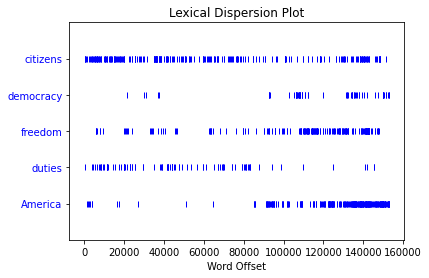

In [53]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

In [54]:
text3.generate()

Building ngram index...


lamb for a burnt offering in the city . , duke Elah , duke Shobal ,
and Akan . and looked upon my affliction . Because the LORD God
amongst the trees of the mighty God of Abraham his father , that they
found a plain man , and the wo The blessings of my hand to do justice
and judgment ; that the LORD that spake unto me , and put him into the
ark , and for your little ones . they heard that they have brought it
unto Hagar , Sarai ' s brother will I slay


"lamb for a burnt offering in the city . , duke Elah , duke Shobal ,\nand Akan . and looked upon my affliction . Because the LORD God\namongst the trees of the mighty God of Abraham his father , that they\nfound a plain man , and the wo The blessings of my hand to do justice\nand judgment ; that the LORD that spake unto me , and put him into the\nark , and for your little ones . they heard that they have brought it\nunto Hagar , Sarai ' s brother will I slay"